### Sentiment Analysis

## IMPORTING PACKAGE

In [1]:
import numpy as np
import pandas as pd
import random
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *


In [2]:
import json
import re
import sys
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import collections
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### Importing and Reading Dataset

In [3]:
df = pd.read_excel('skripsi.xlsx', sheet_name='cleaned data')
df.head()

,Jenis Kelamin,Usia,Tempat tinggal,Kelas,Jurusan,Nama dan alamat/kota sekolah,Daerah domisili,Provinsi,Bagaimana sistem pembelajaran yang Anda jalani saat ini?,Berapa semester Anda menjalani pembelajaran daring di sekolah yang sekarang ini (saat di SMA)?,...,Seberapa sering Anda merasa bosan selama menjalani pembelajaran daring?,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,Jelaskan hal apa saja yang membuat Anda merasa bosan menjalani pembelajaran daring.,Bagaimana hal atau situasi tersebut menyebabkan Anda merasa bosan?,"Pada waktu merasa bosan dengan pembelajaran daring, apa saja yang Anda lakukan untuk mengatasinya?",Bagaimana upaya yang Anda lakukan dapat menurunkan kebosanan yang dirasakan?,"Pada waktu merasa bosan dengan pembelajaran daring, apakah Anda mengharapkan bantuan dari orang lain?","Jika Ya, Bantuan dari siapakah yang paling Anda harapkan?","Jika Ya, bantuan apa yang Anda harapkan untuk mengatasi kebosanan yang dirasakan?",Bagaimana kebosanan yang Anda alami selama pembelajaran daring berdampak pada diri Anda?
0,Perempuan,17,Rumah orang tua,XI,IPS,MA Al-Kautsar,Cilacap,Jawa Tengah,Luring penuh (full offline/tatap muka penuh),1,...,Kadang-kadang,"Bosan karna tidak ada teman, terbatasi karna o...",Tidak ada teman,Karena sistem pembelajaran yang berbeda-beda d...,Buka hiburan seperti Tiktok atau makan,Ingat dengan tujuan,Ya,"Teman, Guru, Orangtua",Diskusi,"iya, belajar menjadi kurang fokus"
1,Perempuan,16,Rumah orang tua,X,IPA,MA Al-Kautsar,Banjar,Jawa Barat,Luring penuh (full offline/tatap muka penuh),1,...,Kadang-kadang,Kadang bosan karena tidak ada partner belajar,Banyak tugas,Kalau ada teman jadi termotivasi belajar buat ...,"Kadang baca AU atau Wattpad, lalu lanjut belaj...",Bersyukur dan kalau belajar sambil mendengarka...,Ya,Guru,"Ingin curhat, kalau memberi tugas jangan banya...","Tahan aja sih, namanya juga belajar serta juga..."
2,Perempuan,15,Rumah orang tua,X,IPS,MA Al-Kautsar,Jawa Barat,Jawa Barat,Kombinasi daring-luring (Pertemuan Tatap Muka ...,1,...,Sangat sering,"Gabut seperti tidak ada kegiatan, tidak ada te...","Tidak ada teman mengobrol, tidak bisa menanyak...",Ketika guru memberi penjelasan yang sangat lama,Tidur,Memainkan pensil,Ya,"Teman, Orangtua","Menjahili, mengobrol",Iya karena banyak hal yang tidak bisa saya lak...
3,Perempuan,14,Rumah orang tua,X,IPA,MA Al-Kautsar,Jawa Barat,Jawa Barat,Daring penuh (full online),1,...,Jarang,Saat tidak ada sinyal,Terlalu banyak soal,"Jarang bosan karana daring, kalau sedang bosan...",Menghibur diri sendiri,"Menghibur diri, mencari tempat nyaman untuk da...",Ya,Siapa saja yang ada,Saat tidak tahu salah satu pertanyaan,"Jarang bosan sih kalo daring, saya suka kesal ..."
4,Perempuan,16,Rumah orang tua,X,IPA,MA Al-Kautsar,Bandung,Jawa Barat,Kombinasi daring-luring (Pertemuan Tatap Muka ...,1,...,Kadang-kadang,Bosan karena harus melihat HP terus,"Selalu mengisi link, banyak tugas",Terlalu lama melihat layar HP yang isinya hany...,"Tidur, ngemil, nonton",Iya,Ya,Teman,Mengobrol di WA,Tidak terlalu berdampak


In [4]:
df=df[['Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.']]
df.head()

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.
0,"Bosan karna tidak ada teman, terbatasi karna o..."
1,Kadang bosan karena tidak ada partner belajar
2,"Gabut seperti tidak ada kegiatan, tidak ada te..."
3,Saat tidak ada sinyal
4,Bosan karena harus melihat HP terus


In [5]:
df['remove_lower_punct'] = df['Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()

display(df.head(10))

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_23280/3474530635.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['remove_lower_punct'] = df['Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()


,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...
3,Saat tidak ada sinyal,saat tidak ada sinyal
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...


#### Importing package for sentiment analysis

In [6]:
# apply sentiment analysis
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in df['remove_lower_punct'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.1:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > 0.05 and sentiment_score['compound'] < 0.1:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list

display(df.head(10))

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman,Negative,0.0
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...,Negative,0.0
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...,Negative,0.0
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik,Negative,0.0
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...,Negative,0.0


In [7]:
df['sentiment'].value_counts()

Negative    216
Positive     47
Name: sentiment, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
def value_counts(df, col, style=True):
    table = df[col].value_counts().rename_axis('Value').reset_index(name='Count')
    table['Percentage'] = table['Count'] / table['Count'].sum(axis=0)
    
    if style:
        table = table.style.format({'Count': '{:,}', 'Percentage': '{:.2%}'}).hide_index()
        
    return table

In [10]:
value_counts(df,'sentiment')

Value,Count,Percentage
Negative,216,82.13%
Positive,47,17.87%


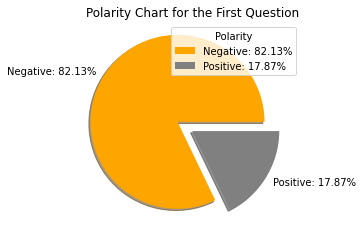

In [11]:
y=np.array([216,47])
mylabels=["Negative: 82.13%","Positive: 17.87%"]
myexplode=[0.2,0]
mycolors=["Orange","Gray"]
plt.pie(y, labels=mylabels, colors=mycolors,explode=myexplode,shadow=True)
plt.legend(title="Polarity")
plt.title('Polarity Chart for the First Question')
plt.show()

In [12]:
df['tokenise'] = df.apply(lambda row: nltk.word_tokenize(row[1]), axis=1)

display(df.head(10))

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score,tokenise
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0,"[bosan, karna, tidak, ada, teman, terbatasi, k..."
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0,"[kadang, bosan, karena, tidak, ada, partner, b..."
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0,"[gabut, seperti, tidak, ada, kegiatan, tidak, ..."
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0,"[saat, tidak, ada, sinyal]"
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0,"[bosan, karena, harus, melihat, hp, terus]"
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman,Negative,0.0,"[bosan, tidak, bisa, ketemu, teman]"
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...,Negative,0.0,"[terganggu, dengan, pekerjaan, rumah, ditambah..."
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...,Negative,0.0,"[kurang, memahami, pelajaran, jadi, harus, ter..."
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik,Negative,0.0,"[monoton, tidak, ada, yang, menarik]"
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...,Negative,0.0,"[ingin, bertemu, dengan, teman, teman, guru, s..."


In [14]:
from wordcloud import STOPWORDS

In [15]:
from nltk.corpus import stopwords

In [17]:
# initiate stopwords from nltk

stop_words = stopwords.words('Indonesian')



# remove stopwords

df['remove_stopwords'] = df['tokenise'].apply(lambda x: [item for item in x if item not in stop_words])

display(df.head(10))

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0,"[bosan, karna, tidak, ada, teman, terbatasi, k...","[bosan, karna, teman, terbatasi, karna, online]"
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0,"[kadang, bosan, karena, tidak, ada, partner, b...","[kadang, bosan, partner, belajar]"
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0,"[gabut, seperti, tidak, ada, kegiatan, tidak, ...","[gabut, kegiatan, teman, mengobrol]"
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0,"[saat, tidak, ada, sinyal]",[sinyal]
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0,"[bosan, karena, harus, melihat, hp, terus]","[bosan, hp]"
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman,Negative,0.0,"[bosan, tidak, bisa, ketemu, teman]","[bosan, ketemu, teman]"
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...,Negative,0.0,"[terganggu, dengan, pekerjaan, rumah, ditambah...","[terganggu, pekerjaan, rumah, ditambah, tugas]"
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...,Negative,0.0,"[kurang, memahami, pelajaran, jadi, harus, ter...","[memahami, pelajaran, belajar, belajar, bosen,..."
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik,Negative,0.0,"[monoton, tidak, ada, yang, menarik]","[monoton, menarik]"
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...,Negative,0.0,"[ingin, bertemu, dengan, teman, teman, guru, s...","[bertemu, teman, teman, guru, suasana, sekolah]"


In [18]:
# initiate nltk lemmatiser

wordnet_lemmatizer = WordNetLemmatizer()

# lemmatise words

df['lemmatise'] = df['remove_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 

display(df.head(10))

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0,"[bosan, karna, tidak, ada, teman, terbatasi, k...","[bosan, karna, teman, terbatasi, karna, online]","[bosan, karna, teman, terbatasi, karna, online]"
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0,"[kadang, bosan, karena, tidak, ada, partner, b...","[kadang, bosan, partner, belajar]","[kadang, bosan, partner, belajar]"
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0,"[gabut, seperti, tidak, ada, kegiatan, tidak, ...","[gabut, kegiatan, teman, mengobrol]","[gabut, kegiatan, teman, mengobrol]"
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0,"[saat, tidak, ada, sinyal]",[sinyal],[sinyal]
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0,"[bosan, karena, harus, melihat, hp, terus]","[bosan, hp]","[bosan, hp]"
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman,Negative,0.0,"[bosan, tidak, bisa, ketemu, teman]","[bosan, ketemu, teman]","[bosan, ketemu, teman]"
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...,Negative,0.0,"[terganggu, dengan, pekerjaan, rumah, ditambah...","[terganggu, pekerjaan, rumah, ditambah, tugas]","[terganggu, pekerjaan, rumah, ditambah, tugas]"
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...,Negative,0.0,"[kurang, memahami, pelajaran, jadi, harus, ter...","[memahami, pelajaran, belajar, belajar, bosen,...","[memahami, pelajaran, belajar, belajar, bosen,..."
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik,Negative,0.0,"[monoton, tidak, ada, yang, menarik]","[monoton, menarik]","[monoton, menarik]"
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...,Negative,0.0,"[ingin, bertemu, dengan, teman, teman, guru, s...","[bertemu, teman, teman, guru, suasana, sekolah]","[bertemu, teman, teman, guru, suasana, sekolah]"


In [19]:
# initialise the count vectorizer

vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2))
                            
# join the processed data to be vectorised

vectors = []

for index, row in df.iterrows():
    vectors.append(", ".join(row[6]))

vectorised = vectorizer.fit_transform(vectors)

print(vectorised)

  (0, 137)	1
  (0, 457)	1
  (0, 1021)	1
  (0, 1034)	1
  (0, 455)	1
  (1, 438)	1
  (1, 160)	1
  (1, 795)	1
  (2, 339)	1
  (2, 470)	1
  (2, 1006)	1
  (4, 133)	1
  (5, 141)	1
  (5, 496)	1
  (6, 1036)	1
  (6, 797)	1
  (6, 892)	1
  (6, 306)	1
  (7, 636)	1
  (7, 798)	1
  (7, 27)	1
  (7, 31)	1
  (7, 181)	1
  (7, 106)	1
  (7, 1020)	1
  :	:
  (258, 286)	1
  (258, 602)	1
  (258, 563)	1
  (258, 196)	1
  (258, 1106)	1
  (259, 115)	1
  (259, 57)	1
  (259, 878)	1
  (259, 620)	1
  (260, 296)	1
  (260, 289)	1
  (260, 939)	1
  (260, 23)	1
  (260, 40)	1
  (260, 444)	1
  (260, 950)	1
  (261, 636)	1
  (261, 799)	1
  (261, 982)	1
  (261, 233)	1
  (261, 631)	1
  (261, 621)	1
  (262, 58)	1
  (262, 888)	1
  (262, 416)	1


In [20]:
# initisalise LDA Model

lda_model = LatentDirichletAllocation(n_components = 5, # number of topics
                                  random_state = 10,          # random state
                                  evaluate_every = -1,      # compute perplexity every n iters, default: Don't
                                  n_jobs = -1,              # Use all available CPUs
                                 )

lda_output = lda_model.fit_transform(vectorised)

# column names

topic_names = ["Topic" + str(i) for i in range(1, lda_model.n_components + 1)]

# make the pandas dataframe

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names)

# get dominant topic for each document

dominant_topic = (np.argmax(df_document_topic.values, axis=1)+1)
df_document_topic['Dominant_topic'] = dominant_topic

# join to original dataframes

df = pd.merge(df, df_document_topic, left_index = True, right_index = True, how = 'outer')
display(df.head(10))

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise,Topic1,Topic2,Topic3,Topic4,Topic5,Dominant_topic
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0,"[bosan, karna, tidak, ada, teman, terbatasi, k...","[bosan, karna, teman, terbatasi, karna, online]","[bosan, karna, teman, terbatasi, karna, online]",0.03,0.03,0.03,0.03,0.87,5
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0,"[kadang, bosan, karena, tidak, ada, partner, b...","[kadang, bosan, partner, belajar]","[kadang, bosan, partner, belajar]",0.05,0.05,0.80,0.05,0.05,3
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0,"[gabut, seperti, tidak, ada, kegiatan, tidak, ...","[gabut, kegiatan, teman, mengobrol]","[gabut, kegiatan, teman, mengobrol]",0.05,0.05,0.05,0.05,0.80,5
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0,"[saat, tidak, ada, sinyal]",[sinyal],[sinyal],0.20,0.20,0.20,0.20,0.20,1
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0,"[bosan, karena, harus, melihat, hp, terus]","[bosan, hp]","[bosan, hp]",0.10,0.10,0.60,0.10,0.10,3
5,Bosan tidak bisa ketemu teman,bosan tidak bisa ketemu teman,Negative,0.0,"[bosan, tidak, bisa, ketemu, teman]","[bosan, ketemu, teman]","[bosan, ketemu, teman]",0.07,0.07,0.73,0.07,0.07,3
6,Terganggu dengan pekerjaan rumah ditambah lagi...,terganggu dengan pekerjaan rumah ditambah lagi...,Negative,0.0,"[terganggu, dengan, pekerjaan, rumah, ditambah...","[terganggu, pekerjaan, rumah, ditambah, tugas]","[terganggu, pekerjaan, rumah, ditambah, tugas]",0.04,0.84,0.04,0.04,0.04,2
7,Kurang memahami pelajaran jadi harus terus bel...,kurang memahami pelajaran jadi harus terus bel...,Negative,0.0,"[kurang, memahami, pelajaran, jadi, harus, ter...","[memahami, pelajaran, belajar, belajar, bosen,...","[memahami, pelajaran, belajar, belajar, bosen,...",0.03,0.03,0.28,0.03,0.65,5
8,"Monoton, tidak ada yang menarik",monoton tidak ada yang menarik,Negative,0.0,"[monoton, tidak, ada, yang, menarik]","[monoton, menarik]","[monoton, menarik]",0.10,0.60,0.10,0.10,0.10,2
9,"Ingin bertemu dengan teman-teman, guru, suasan...",ingin bertemu dengan teman teman guru suasana ...,Negative,0.0,"[ingin, bertemu, dengan, teman, teman, guru, s...","[bertemu, teman, teman, guru, suasana, sekolah]","[bertemu, teman, teman, guru, suasana, sekolah]",0.03,0.03,0.86,0.03,0.03,3


In [21]:
df.head()

,Ceritakan perasaan bosan yang Anda rasakan selama menjalani pembelajaran daring.,remove_lower_punct,sentiment,sentiment score,tokenise,remove_stopwords,lemmatise,Topic1,Topic2,Topic3,Topic4,Topic5,Dominant_topic
0,"Bosan karna tidak ada teman, terbatasi karna o...",bosan karna tidak ada teman terbatasi karna on...,Negative,0.0,"[bosan, karna, tidak, ada, teman, terbatasi, k...","[bosan, karna, teman, terbatasi, karna, online]","[bosan, karna, teman, terbatasi, karna, online]",0.03,0.03,0.03,0.03,0.87,5
1,Kadang bosan karena tidak ada partner belajar,kadang bosan karena tidak ada partner belajar,Negative,0.0,"[kadang, bosan, karena, tidak, ada, partner, b...","[kadang, bosan, partner, belajar]","[kadang, bosan, partner, belajar]",0.05,0.05,0.80,0.05,0.05,3
2,"Gabut seperti tidak ada kegiatan, tidak ada te...",gabut seperti tidak ada kegiatan tidak ada tem...,Negative,0.0,"[gabut, seperti, tidak, ada, kegiatan, tidak, ...","[gabut, kegiatan, teman, mengobrol]","[gabut, kegiatan, teman, mengobrol]",0.05,0.05,0.05,0.05,0.80,5
3,Saat tidak ada sinyal,saat tidak ada sinyal,Negative,0.0,"[saat, tidak, ada, sinyal]",[sinyal],[sinyal],0.20,0.20,0.20,0.20,0.20,1
4,Bosan karena harus melihat HP terus,bosan karena harus melihat hp terus,Negative,0.0,"[bosan, karena, harus, melihat, hp, terus]","[bosan, hp]","[bosan, hp]",0.10,0.10,0.60,0.10,0.10,3


In [22]:
# index names
docnames = ['Doc' + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=df)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topic_names

df_topic_no = pd.DataFrame(df_topic_keywords.idxmax())
df_scores = pd.DataFrame(df_topic_keywords.max())

tmp = pd.merge(df_topic_no, df_scores, left_index=True, right_index=True)
tmp.columns = ['topic', 'relevance_score']

display(tmp)

,topic,relevance_score
absen daring,Topic4,1.199995
absen kuota,Topic3,1.199980
absen penjelasan,Topic1,1.199997
absensi online,Topic3,1.199990
adaah menatap,Topic5,1.199979
...,...,...
yg diajarkan,Topic4,1.199979
yg monoton,Topic4,1.199977
zoom interaksi,Topic4,1.199995
zoom main,Topic4,1.199991


In [23]:
tmp['topicright'] = tmp['topic'].str[-1:]
print(tmp)

                   topic  relevance_score topicright
absen daring      Topic4         1.199995          4
absen kuota       Topic3         1.199980          3
absen penjelasan  Topic1         1.199997          1
absensi online    Topic3         1.199990          3
adaah menatap     Topic5         1.199979          5
...                  ...              ...        ...
yg diajarkan      Topic4         1.199979          4
yg monoton        Topic4         1.199977          4
zoom interaksi    Topic4         1.199995          4
zoom main         Topic4         1.199991          4
zoom meeting      Topic1         1.203351          1

[1119 rows x 3 columns]


In [24]:
tmp=tmp[['topicright','relevance_score']]
tmp['topic']=tmp['topicright']

,topicright,relevance_score,topic
absen daring,4,1.199995,4
absen kuota,3,1.199980,3
absen penjelasan,1,1.199997,1
absensi online,3,1.199990,3
adaah menatap,5,1.199979,5


In [25]:
tmp=tmp[['topic','relevance_score']]
tmp

,topic,relevance_score
absen daring,4,1.199995
absen kuota,3,1.199980
absen penjelasan,1,1.199997
absensi online,3,1.199990
adaah menatap,5,1.199979
...,...,...
yg diajarkan,4,1.199979
yg monoton,4,1.199977
zoom interaksi,4,1.199995
zoom main,4,1.199991


In [26]:
all_topics = []

for i in tmp['topic'].unique():    
    tmp_1 = tmp.loc[tmp['topic'] == i].reset_index()
    tmp_1 = tmp_1.sort_values('relevance_score', ascending=False).head(1)

    tmp_1['topic'] = tmp_1['topic'] 
    
    tmp_2 = []
    tmp_2.append(tmp_1['topic'].unique()[0])
    tmp_2.append(list(tmp_1['index'].unique()))
    all_topics.append(tmp_2)

all_topics = pd.DataFrame(all_topics, columns=['Dominant_topic', 'topic_name'])
display(all_topics)

,Dominant_topic,topic_name
0,4,[pembelajaran daring]
1,3,[bertemu teman]
2,1,[kebosanan belajar]
3,5,[bosan belajar]
4,2,[bosan teman]


In [27]:
all_topics['Dominant_topic']=all_topics['Dominant_topic'].astype(int)
all_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dominant_topic  5 non-null      int32 
 1   topic_name      5 non-null      object
dtypes: int32(1), object(1)
memory usage: 188.0+ bytes


In [28]:
results = df.groupby(['Dominant_topic', 'sentiment']).count().reset_index()

results = results.merge(all_topics, on='Dominant_topic')
results['topic_name'] = results['topic_name'].apply(', '.join)

graph_results = results[['topic_name', 'sentiment', 'sentiment score']]
graph_results = graph_results.pivot(index='topic_name', columns='sentiment', values='sentiment score').reset_index()

graph_results.set_index('topic_name', inplace=True)

display(graph_results)

sentiment,Negative,Positive
topic_name,,
bertemu teman,52,6
bosan belajar,38,6
bosan teman,26,11
kebosanan belajar,55,6
pembelajaran daring,45,18


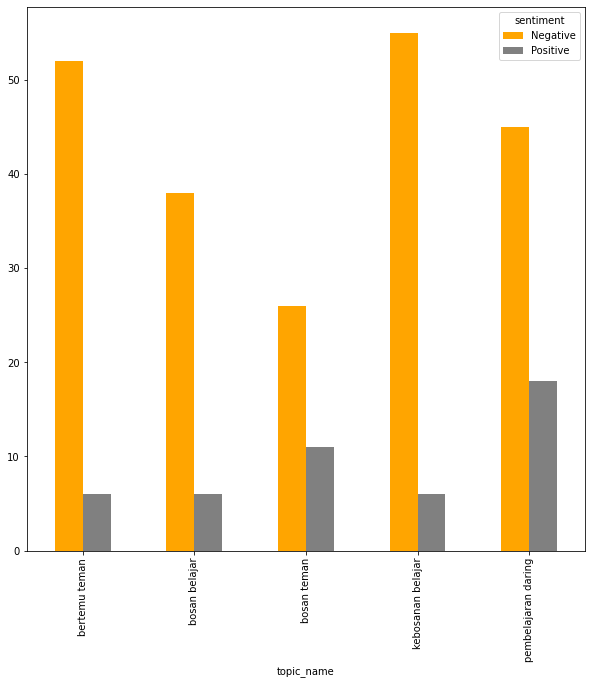

In [29]:
c=['orange','gray']
fig = graph_results.plot.bar(rot=90, figsize=(10,10), color=c)
